In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
tao = pd.read_csv('TAO_2006.csv')

## A1. Dataset size

In [3]:
#A1
row_count = tao.shape[0]
tao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 8 columns):
Timestamp    35136 non-null int64
YYYYMMDD     35136 non-null int64
HHMMSS       35136 non-null int64
PREC         35136 non-null float64
AIRT         35136 non-null float64
SST          35136 non-null float64
RH           35136 non-null float64
Q            35136 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 2.1+ MB


 ## A2. Min/Max values in each column

In [4]:
#A2
max_prec = tao['PREC'].max()
max_airt = tao['AIRT'].max()
max_sst = tao['SST'].max()
max_rh = tao['RH'].max()
print(max_prec)
print(max_airt)
print(max_sst)
print(max_rh)

75.77
31.57
31.346
98.1


## A3. Number of records in each month

In [5]:
#A3
tao['DateTime'] = pd.to_datetime(tao['YYYYMMDD'].astype(str), format='%Y%m%d')
tao1 = tao.drop(['YYYYMMDD'],axis = 1)
tao1 = tao1[['Timestamp', 'DateTime','HHMMSS','PREC','AIRT','SST','RH','Q']]
tao_month = tao1
tao_month.index = tao1['DateTime']
tao_month = tao_month['DateTime'].resample('M').count()
tao_month = tao_month.to_frame()
tao_month.columns = ["Counts"]
tao_month.min()
tao_month.max()
tao1

,Timestamp,DateTime,HHMMSS,PREC,AIRT,SST,RH,Q
DateTime,,,,,,,,
2006-01-01,0,2006-01-01,0,-0.17,28.75,29.690,79.8,HighQ
2006-01-01,1,2006-01-01,1000,0.00,28.86,29.708,79.2,HighQ
2006-01-01,2,2006-01-01,2000,-0.02,28.91,29.749,79.4,HighQ
2006-01-01,3,2006-01-01,3000,-0.01,28.85,29.757,78.4,HighQ
2006-01-01,4,2006-01-01,4000,-0.02,28.87,29.787,77.8,HighQ
2006-01-01,5,2006-01-01,5000,-0.04,28.71,29.793,78.2,HighQ
2006-01-01,6,2006-01-01,10000,-0.02,28.66,29.803,77.5,HighQ
2006-01-01,7,2006-01-01,11000,0.01,28.64,29.815,77.5,HighQ
2006-01-01,8,2006-01-01,12000,-0.01,28.64,29.788,78.3,HighQ


## A4. Missing values

In [6]:
#1)
filt = (tao['AIRT'] == -99.9) | (tao['PREC'] == -9.99) | (tao['SST'] == -99.9) | (tao['RH'] == -99.9)
hasNA_tao = tao[filt]
row_count = hasNA_tao.shape[0]
row_count

401

In [7]:
#2)
hasNA_tao['DateTime'] = pd.to_datetime(hasNA_tao['YYYYMMDD'].astype(str), format='%Y%m%d')
hasNA_tao["month"] = hasNA_tao["DateTime"].dt.month
hasNA_tao["month"].value_counts().sort_index()

/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1      3
3      6
4      3
6      5
7    243
8    141
Name: month, dtype: int64

In [8]:
#3)
filt = (tao1['AIRT'] != -99.9) & (tao1['PREC'] != -9.99) & (tao1['SST'] != -99.9) & (tao1['RH'] != -99.9)
noNA_tao = tao1[filt]
noNA_tao

,Timestamp,DateTime,HHMMSS,PREC,AIRT,SST,RH,Q
DateTime,,,,,,,,
2006-01-01,0,2006-01-01,0,-0.17,28.75,29.690,79.8,HighQ
2006-01-01,1,2006-01-01,1000,0.00,28.86,29.708,79.2,HighQ
2006-01-01,2,2006-01-01,2000,-0.02,28.91,29.749,79.4,HighQ
2006-01-01,3,2006-01-01,3000,-0.01,28.85,29.757,78.4,HighQ
2006-01-01,4,2006-01-01,4000,-0.02,28.87,29.787,77.8,HighQ
2006-01-01,5,2006-01-01,5000,-0.04,28.71,29.793,78.2,HighQ
2006-01-01,6,2006-01-01,10000,-0.02,28.66,29.803,77.5,HighQ
2006-01-01,7,2006-01-01,11000,0.01,28.64,29.815,77.5,HighQ
2006-01-01,8,2006-01-01,12000,-0.01,28.64,29.788,78.3,HighQ


## A5. Investigating Sea surface temperature (SST) in different months

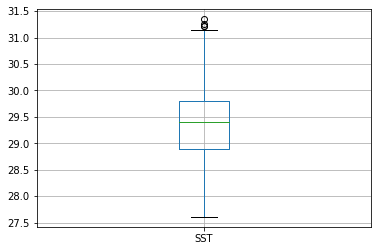

In [9]:
SSTtao = noNA_tao.drop(['AIRT',"Q","Timestamp","PREC","HHMMSS","RH"],axis = 1)
SST_median_groupby = SSTtao.resample("M").median()
SSTtao.boxplot(column = 'SST')

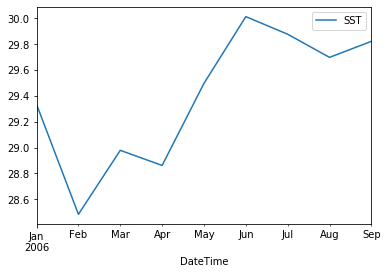

In [10]:
SST_median_groupby.plot()

In [11]:
print(SST_median_groupby.max())
print(SST_median_groupby.min())

SST    30.013
dtype: float64
SST    28.484
dtype: float64


## A6. Exploring precipitation measurements (PREC)

Text(0.5, 0, 'Timestamp')

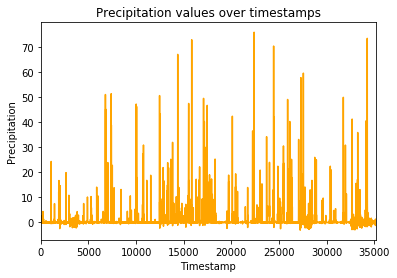

In [12]:
#1)
PRECtao = noNA_tao.drop(['AIRT',"Q","DateTime","SST","HHMMSS","RH"],axis = 1)
timegraph = PRECtao.plot(x = 'Timestamp',y = 'PREC',color = 'orange',legend=False)
plt.title("Precipitation values over timestamps")
plt.ylabel("Precipitation")
plt.xlabel("Timestamp")

In [13]:
#2)
noNA_tao["PREC"][noNA_tao["PREC"] < 0] = 0

/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shlok/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/shlok/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


## A7. Relationship between variables

In [14]:
correlation = noNA_tao[["PREC","AIRT","SST","RH"]].corr()
correlation

,PREC,AIRT,SST,RH
PREC,1.000000,-0.303513,-0.034852,0.267698
AIRT,-0.303513,1.000000,0.366119,-0.795451
SST,-0.034852,0.366119,1.000000,-0.456037
RH,0.267698,-0.795451,-0.456037,1.000000


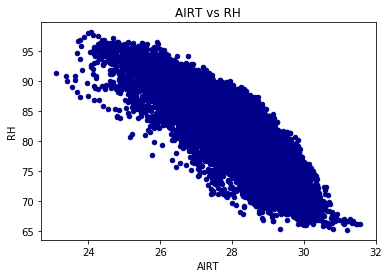

In [15]:
scatter_plt = noNA_tao.plot.scatter(x='AIRT',y='RH',c='DarkBlue',title = "AIRT vs RH")
scatter_plt

## A8. Predicting quality of measurements (Q)

In [16]:
X = noNA_tao.iloc[:, [3, 4, 5, 6]].values
y = noNA_tao.iloc[:, 7].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[8670,    8],
       [   4,    2]])

In [22]:
tp = cm[0][0]
fn = cm[0][1]
fp = cm[1][0]
tn = cm[1][1]
accuracy = (tp + tn)/(tp+tn+fp+fn)
accuracy

0.9986181483187471

In [23]:
precision = tp/(tp+fp)
npv = tn/(tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

## A9. Investigating daily relative humidity (RH)

In [24]:
RHtao = noNA_tao.drop(['AIRT',"Q","SST","HHMMSS","PREC","Timestamp"],axis = 1)
RHtao_median_groupby = RHtao.resample("D").median()

In [25]:
TimeStamp = []
for i in range(244):
    TimeStamp.append(i+1)
RHtao_median_groupby["TimeStamp"] = TimeStamp

In [26]:
#sns.set(rc={'figure.figsize':(11, 4)})

intercept: 81.74444444444444
slope: [-0.0127315]


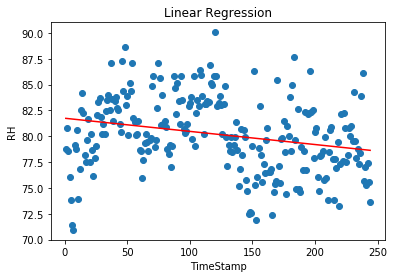

In [27]:
x = np.array(RHtao_median_groupby["TimeStamp"]).reshape(-1,1)
y = np.array(RHtao_median_groupby["RH"])
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Linear Regression') 
plt.xlabel('TimeStamp') 
plt.ylabel('RH') 
plt.show()

In [28]:
array = np.array(245).reshape(-1,1)
model.predict(array)

array([78.62522769])

In [29]:
poly = PolynomialFeatures(degree = 10) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

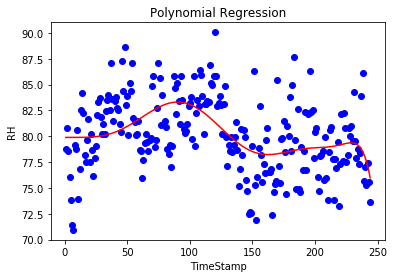

In [30]:
plt.scatter(x, y, color = 'blue') 
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('TimeStamp') 
plt.ylabel('RH') 
plt.show() 

In [31]:
x = np.array(245).reshape(-1,1)
lin2.predict(poly.fit_transform(x))

array([75.26033295])

ValueError: x and y must be the same size

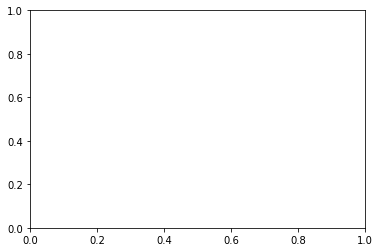

In [33]:
plt.scatter(x, y, color = 'blue') 
plt.plot(x, y_pred, color='red')  
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('TimeStamp') 
plt.ylabel('RH') 
plt.show() 

## A10. Filling in missing values

In [34]:
tao = pd.read_csv('TAO_2006.csv')
tao1 = tao.drop(['AIRT',"Q","SST","HHMMSS","PREC","YYYYMMDD"],axis = 1)
rh_array = tao1["RH"]
for i in range(len(rh_array)):
    if rh_array[i] == -99.9:
        x = np.array(i).reshape(-1,1)
        rh_array[i] = lin2.predict(poly.fit_transform(x))
        
tao1["RH"] = rh_array

/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopy

/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopy

/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/shlok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopy

## Task B: K-means Clustering on Other Data 

In [35]:
#https://www.kaggle.com/antallen/comparing-numerical-movie-review-scores/downloads/comparing-numerical-movie-review-scores.zip/1
df=pd.read_csv('MoviesData.csv')
df

,Titles,Rating,RTCritic,RTFan,IMDb,Metacritic,BoxOffice,Year,Action,Animation,Family,Scifi,Comedy,Drama,International,Romance,Horror,Mystery,Documentary
0,Treasure Planet,PG,69,70,7.1,60,38120554,2002,1,1,1,1,0,0,0,0,0,0,0
1,About Schmidt,R,85,74,7.2,85,65005217,2002,0,0,0,0,1,1,0,0,0,0,0
2,Secretary,R,76,82,7.0,63,4046737,2002,0,0,0,0,1,1,1,1,0,0,0
3,Irreversible,NR,57,80,7.4,51,792200,2002,0,0,0,0,0,1,1,0,0,0,0
4,Big Trouble,PG13,48,54,6.5,47,7262288,2002,0,0,0,0,1,1,0,0,0,0,0
5,Resident Evil,R,34,67,6.7,33,40119709,2002,1,0,0,0,0,0,0,0,1,1,0
6,Panic Room,R,76,63,6.8,65,95308367,2002,0,0,0,0,0,1,0,0,0,1,0
7,Die Another Day,PG13,58,41,6.1,58,160942139,2002,1,0,0,0,0,0,0,0,0,1,0
8,Life or Something Like It,PG13,28,44,5.8,31,14448589,2002,0,0,0,0,1,0,0,1,0,0,0
9,Martin Lawrence Live: Runteldat,R,39,70,5.4,40,19184820,2002,0,0,0,0,1,0,0,0,0,0,0


In [36]:
kmeans = KMeans(n_clusters=4).fit(df[['BoxOffice','IMDb']])

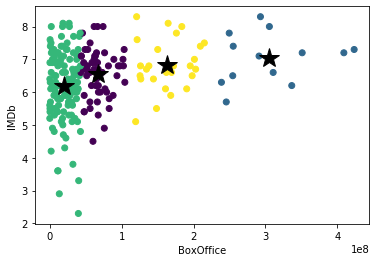

In [37]:
# Visualise the output labels
plt.scatter(x=df['BoxOffice'],y=df['IMDb'], c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('BoxOffice')
plt.ylabel('IMDb')
plt.show()